In [1]:
%pip install pandas numpy matplotlib seaborn scikit-learn xgboost imblearn openpyxl

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/124.9 MB 1.5 MB/s eta 0:01:22
   ---------------------------------------- 0.1/124.9 MB 1.4 MB/s eta 0:01:27
   ---------------------------------------- 0.2/124.9 MB 1.9 MB/s eta 0:01:07
   ---------------------------------------- 0.4/124.9 MB 2.3 MB/s eta 0:00:55
   ---------------------------------------- 0.5/124.9 MB 2.7 MB/s eta 0:00:46
   ---------------------------------------- 0.7/124.9 MB 2.6 MB/s eta 0:00:48
   ---------------------------------------- 0.9/124.9 MB 3.1 MB/s eta 0:00:41
   ---------------------------------------- 0.9/124.9 MB 3.1 MB/s eta 0:00:41
   ---------------------------------------- 1.2/124.9 MB 3.0 MB/s eta 0:00:42
   ----------------------------------


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn import over_sampling
import xgboost as xgb
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

## Загрузка датасетов по кредитному скорингу

In [ ]:
data1_df = pd.read_excel("data/credit_risk_file_1.xlsx")
data1_df

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
0,1,5,4,1,0,0,0.000,0.00,0.200,0.800,...,0,0,1,0,4,1,4,0,72,18
1,2,1,0,1,0,0,0.000,0.00,1.000,0.000,...,0,1,0,0,0,0,1,0,7,7
2,3,8,0,8,1,0,0.125,0.00,1.000,0.000,...,0,6,1,0,0,2,6,0,47,2
3,4,1,0,1,1,0,1.000,0.00,1.000,0.000,...,0,0,0,0,0,0,1,1,5,5
4,5,3,2,1,0,0,0.000,0.00,0.333,0.667,...,0,0,0,0,0,3,0,2,131,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51331,51332,3,0,3,1,0,0.333,0.00,1.000,0.000,...,0,2,0,0,0,0,3,1,24,5
51332,51333,4,2,2,0,1,0.000,0.25,0.500,0.500,...,0,2,0,0,0,2,2,0,74,7
51333,51334,2,1,1,1,1,0.500,0.50,0.500,0.500,...,0,2,0,0,0,0,2,0,9,5
51334,51335,2,1,1,0,0,0.000,0.00,0.500,0.500,...,0,2,0,0,0,0,2,0,15,8


In [ ]:
data2_df = pd.read_excel("data/credit_risk_file_2.xlsx")
data2_df

,PROSPECTID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,...,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,1,549,35,15,11,29,29,0,0,0,...,0.0,0.0,0.0,13.333,1,0,PL,PL,696,P2
1,2,47,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,0.860,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,3,302,11,3,9,25,25,1,9,8,...,0.0,0.0,0.0,5741.667,1,0,ConsumerLoan,others,693,P2
3,4,-99999,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,9.900,0,0,others,others,673,P2
4,5,583,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,-99999.000,0,0,AL,AL,753,P1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51331,51332,15,24,23,2,24,24,0,0,0,...,0.0,0.0,0.0,1.661,0,0,ConsumerLoan,ConsumerLoan,650,P4
51332,51333,57,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,0.520,0,0,others,others,702,P1
51333,51334,32,-99999,-99999,0,-99999,0,0,0,0,...,0.0,1.0,0.0,0.567,0,0,ConsumerLoan,others,661,P3
51334,51335,58,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,1.202,0,0,ConsumerLoan,others,686,P2


In [ ]:
# Объединение датасетов
combined_df = pd.merge(data1_df, data2_df, on='PROSPECTID', how="inner")
combined_df

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,1,5,4,1,0,0,0.000,0.00,0.200,0.800,...,0.0,0.0,0.0,13.333,1,0,PL,PL,696,P2
1,2,1,0,1,0,0,0.000,0.00,1.000,0.000,...,0.0,0.0,0.0,0.860,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,3,8,0,8,1,0,0.125,0.00,1.000,0.000,...,0.0,0.0,0.0,5741.667,1,0,ConsumerLoan,others,693,P2
3,4,1,0,1,1,0,1.000,0.00,1.000,0.000,...,0.0,0.0,0.0,9.900,0,0,others,others,673,P2
4,5,3,2,1,0,0,0.000,0.00,0.333,0.667,...,0.0,0.0,0.0,-99999.000,0,0,AL,AL,753,P1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51331,51332,3,0,3,1,0,0.333,0.00,1.000,0.000,...,0.0,0.0,0.0,1.661,0,0,ConsumerLoan,ConsumerLoan,650,P4
51332,51333,4,2,2,0,1,0.000,0.25,0.500,0.500,...,0.0,0.0,0.0,0.520,0,0,others,others,702,P1
51333,51334,2,1,1,1,1,0.500,0.50,0.500,0.500,...,0.0,1.0,0.0,0.567,0,0,ConsumerLoan,others,661,P3
51334,51335,2,1,1,0,0,0.000,0.00,0.500,0.500,...,0.0,0.0,0.0,1.202,0,0,ConsumerLoan,others,686,P2


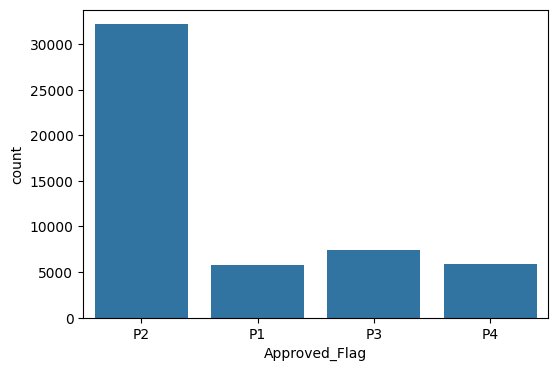

In [ ]:
# Строим гистограмму распределения Approved_Flag, которая показывает, сколько заявок на кредит были одобрены или отклонены.
plt.figure(figsize=(6,4))
sns.countplot(x="Approved_Flag", data=combined_df)
plt.show()

In [ ]:
# Преобразуем категориальную переменную Approved_Flag в числовой формат
le = LabelEncoder()
combined_df["Approved_Flag"] = le.fit_transform(combined_df["Approved_Flag"])
combined_df["Approved_Flag"]

0        1
1        1
2        1
3        1
4        0
        ..
51331    3
51332    0
51333    2
51334    1
51335    1
Name: Approved_Flag, Length: 51336, dtype: int32

## Вычисляем корреляцию между числовыми признаками

In [50]:
corr = combined_df.select_dtypes(include=np.number).corr()
corr

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,PL_Flag,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,Credit_Score,Approved_Flag
PROSPECTID,1.000000,-0.001858,0.000154,-0.006221,-0.002460,0.002525,-0.001665,0.005634,-0.004829,0.004829,...,-0.001352,0.003666,0.006387,0.002112,0.006415,-0.002104,0.003321,-0.000242,-0.008003,-0.009537
Total_TL,-0.001858,1.000000,0.956367,0.652481,0.408441,0.453666,-0.074973,-0.002687,-0.263300,0.263300,...,0.225026,0.071978,0.099260,0.031548,0.073229,0.176329,0.409390,0.098204,0.202859,-0.109168
Tot_Closed_TL,0.000154,0.956367,1.000000,0.402606,0.236070,0.388155,-0.140151,0.020013,-0.383012,0.383012,...,0.153221,0.020372,0.049458,-0.012132,0.029816,0.047898,0.417535,0.068004,0.206652,-0.116916
Tot_Active_TL,-0.006221,0.652481,0.402606,1.000000,0.667361,0.414587,0.128623,-0.060328,0.168503,-0.168503,...,0.307603,0.172670,0.182706,0.130309,0.152096,0.428211,0.199662,0.131294,0.099566,-0.038780
Total_TL_opened_L6M,-0.002460,0.408441,0.236070,0.667361,1.000000,0.505473,0.529940,0.087148,0.096540,-0.096540,...,0.244400,0.276576,0.223809,0.256616,0.213443,0.312958,0.120232,0.009713,-0.112826,0.123776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
max_unsec_exposure_inPct,-0.002104,0.176329,0.047898,0.428211,0.312958,0.130866,0.253858,-0.090238,0.330022,-0.330022,...,0.317171,0.227780,0.165445,0.205231,0.152432,1.000000,-0.097631,-0.010389,-0.066947,0.079222
HL_Flag,0.003321,0.409390,0.417535,0.199662,0.120232,0.140065,-0.099421,-0.038575,-0.343173,0.343173,...,0.006393,-0.030335,-0.002646,-0.040392,-0.007460,-0.097631,1.000000,0.015256,0.162458,-0.104577
GL_Flag,-0.000242,0.098204,0.068004,0.131294,0.009713,0.014198,-0.053952,-0.043672,0.014589,-0.014589,...,0.076200,-0.019397,0.012439,-0.030617,0.004384,-0.010389,0.015256,1.000000,0.149753,-0.111277
Credit_Score,-0.008003,0.202859,0.206652,0.099566,-0.112826,0.031527,-0.255157,-0.065349,-0.182756,0.182756,...,0.037956,-0.378722,-0.202295,-0.387340,-0.204150,-0.066947,0.162458,0.149753,1.000000,-0.835461


<Axes: >

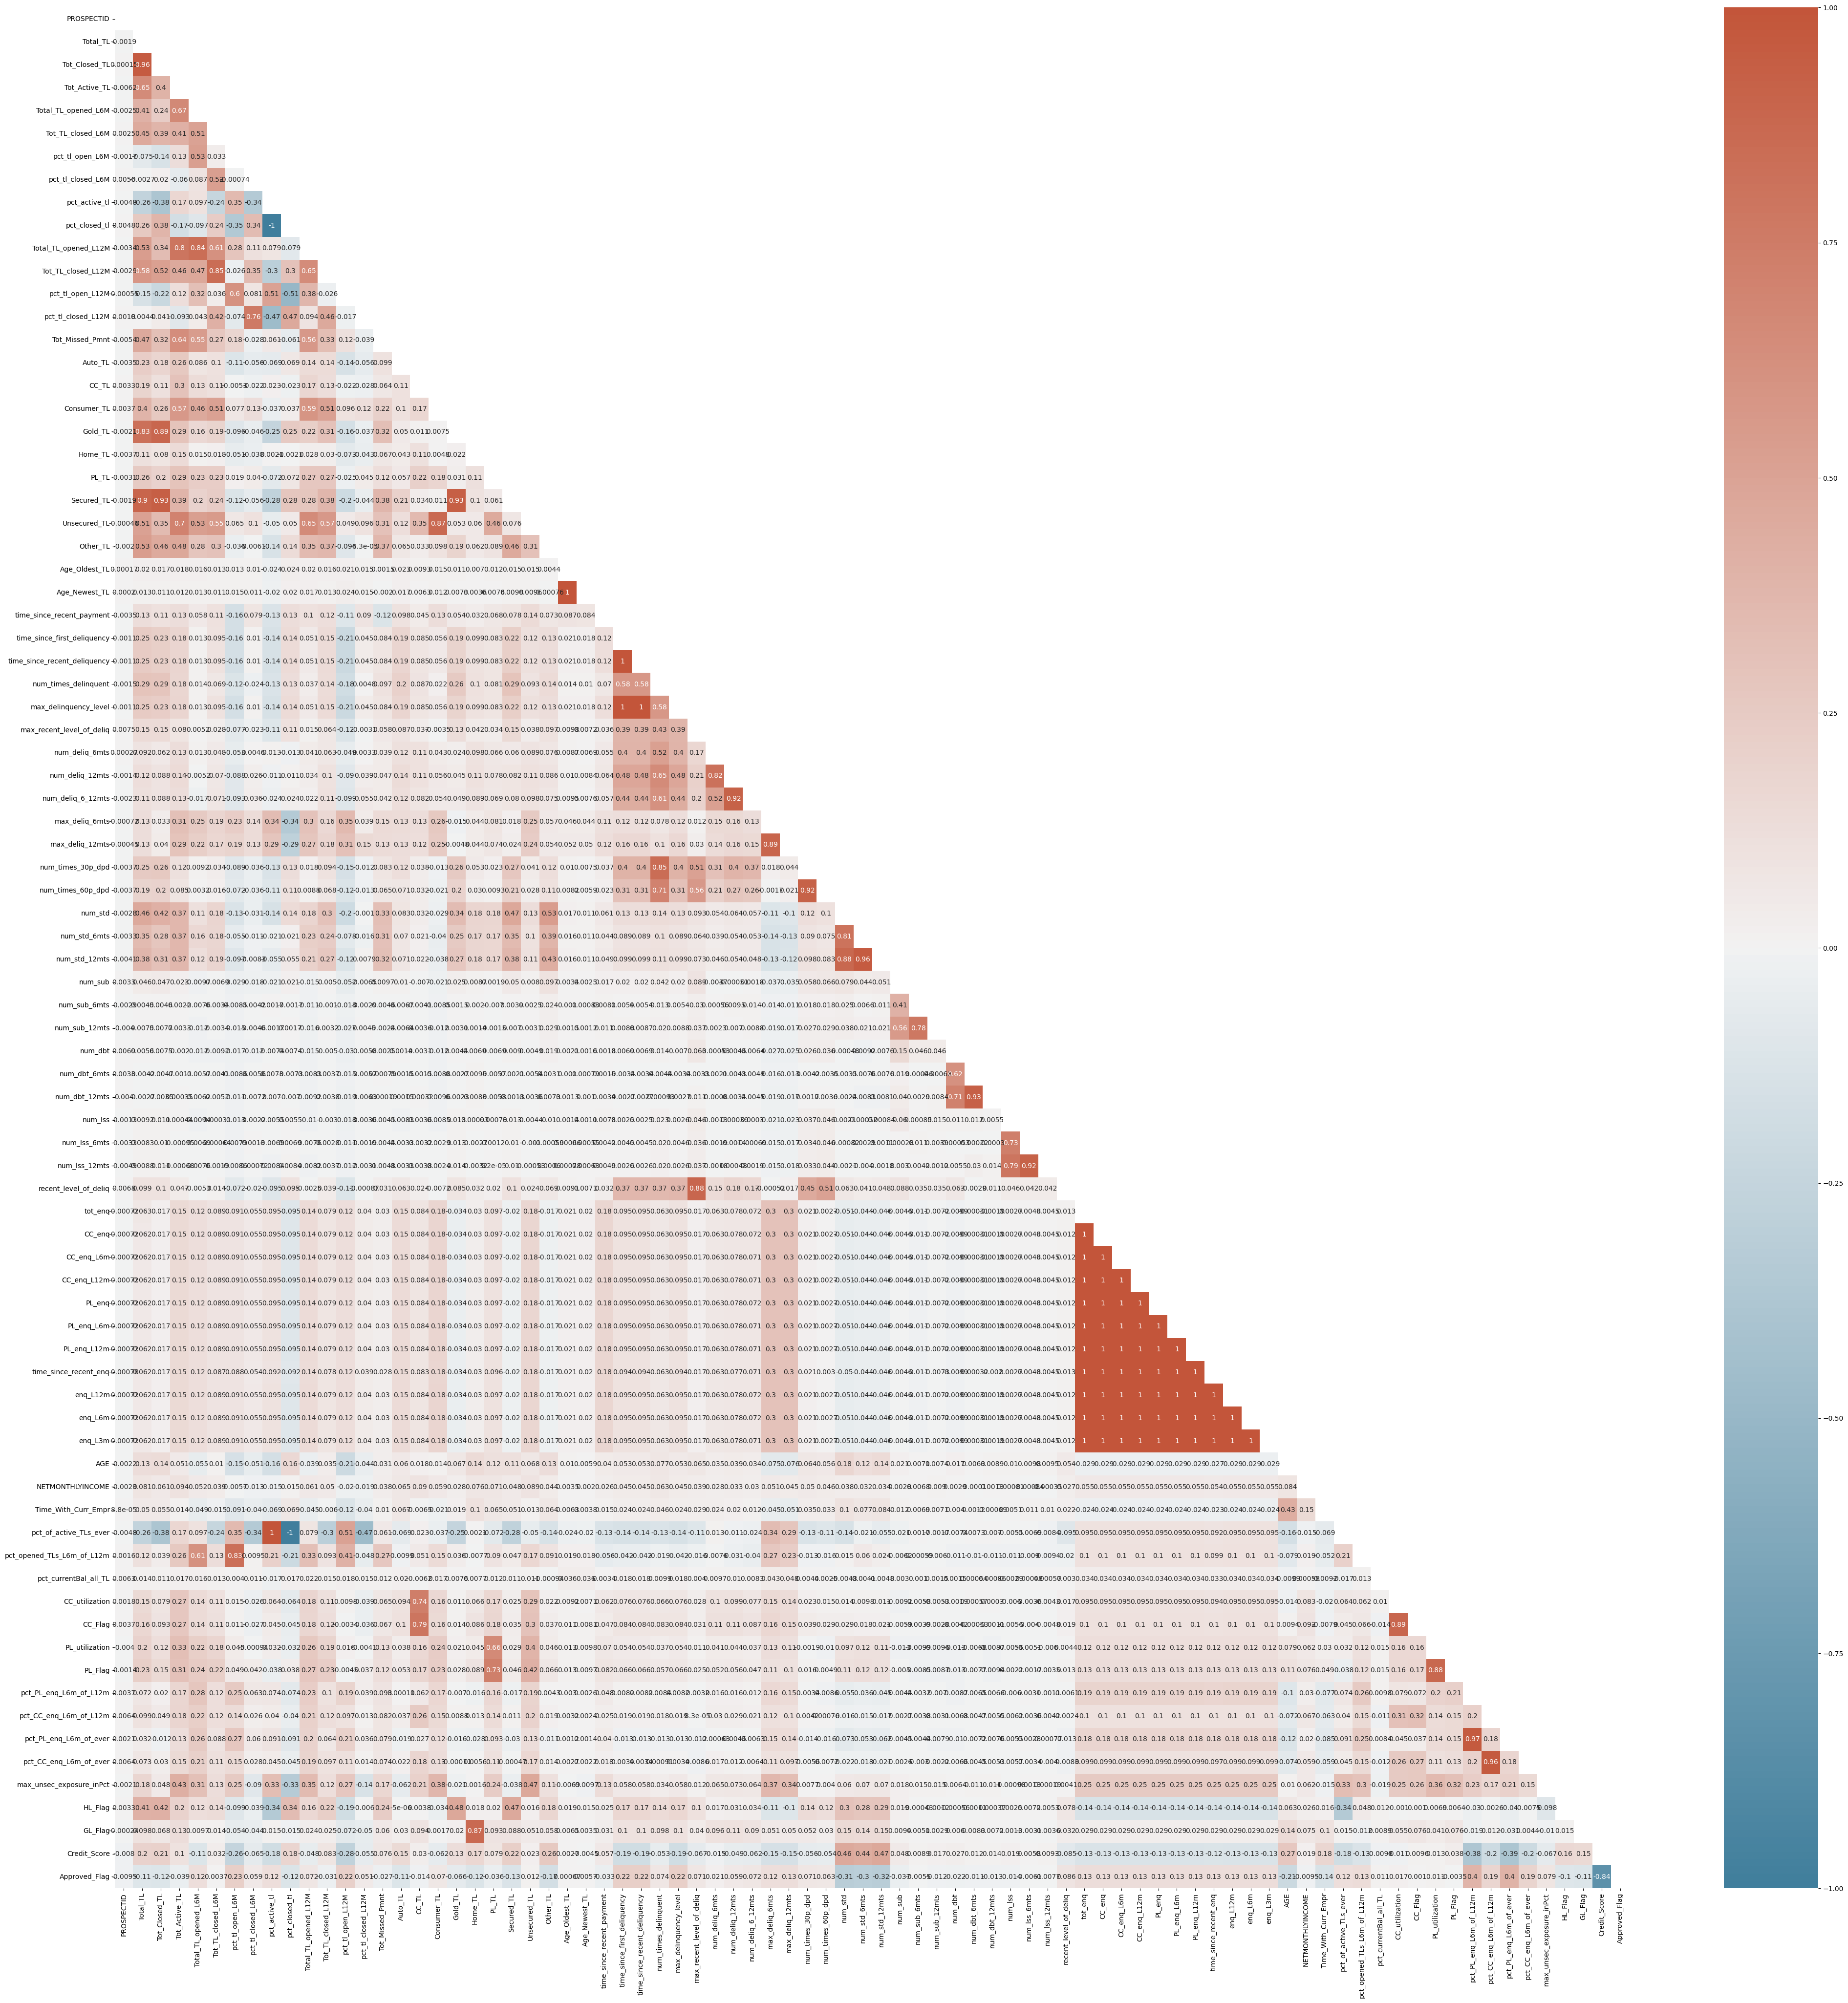

In [51]:
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(50,50))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True)

In [ ]:
# Отбираем признаки, которые имеют полную корреляцию (1.0)
upper_triangle = corr.abs().where(np.triu(mask, k=1).astype(bool))
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] == 1)]
to_drop

['pct_of_active_TLs_ever']

In [53]:
combined_df = combined_df.drop(columns=to_drop, axis=1)

In [54]:
print("Num of missing values:")
print(combined_df.isnull().sum().sum())

Num of missing values:
0


In [ ]:
# Создаем новые информативные признаки, которые могут улучшить модель.

# Соотношение различных типов кредитных счетов
combined_df['Secured_to_Unsecured_Ratio'] = combined_df['Secured_TL'] / (combined_df['Unsecured_TL'] + 0.01)
combined_df['Active_to_Closed_TL_Ratio'] = combined_df['Tot_Active_TL'] / (combined_df['Tot_Closed_TL'] + 0.01)

# Соотношение долга к доходу
combined_df['Debt_to_Income_Ratio'] = combined_df['pct_currentBal_all_TL'] / (combined_df['NETMONTHLYINCOME'] + 0.01)

# Время, прошедшее с момента последней просрочки платежа, пропорционально продолжительности кредитной истории
combined_df['Delinquency_to_Credit_History_Ratio'] = combined_df['time_since_recent_deliquency'] / (combined_df['Age_Oldest_TL'] + 0.01)

# Доля активных счетов
combined_df["Closed_TL_Ratio"] = combined_df["Tot_Closed_TL"] / combined_df["Total_TL"]
# Коэффициент закрытых счетов
combined_df["Active_TL_Ratio"] = combined_df["Tot_Active_TL"] / combined_df["Total_TL"]
# Доля пропущенных платежей
combined_df["Missed_Payment_Ratio"] = combined_df["Tot_Missed_Pmnt"] / combined_df["Total_TL"]
# Коэффициент использования кредитных карт
combined_df["CC_Utilization_Ratio"] = combined_df["CC_utilization"] / combined_df["Total_TL"]
# Доля потребительских кредитов
combined_df["Consumer_Loan_Ratio"] = combined_df["Consumer_TL"] / combined_df["Total_TL"]
# Частота кредитных запросов в последние 6 месяцев
combined_df["Recent_Enquiry_Ratio"] = combined_df["enq_L6m"] / (combined_df["enq_L12m"] + 1)
# Разница между недавними и старыми запросами
combined_df["Enquiry_Change"] = combined_df["enq_L3m"] - (combined_df["enq_L12m"] / 4)

## Подготовка данных и балансировка классов

In [ ]:
#  Разделяем данные на признаки (X) и целевую переменную (y)
X = combined_df.drop(columns=['PROSPECTID', 'Approved_Flag', 'Credit_Score'])
y = combined_df['Approved_Flag']

In [ ]:
# Выбираем числовые признаки из X
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
numeric_features

Index(['Total_TL', 'Tot_Closed_TL', 'Tot_Active_TL', 'Total_TL_opened_L6M',
       'Tot_TL_closed_L6M', 'pct_tl_open_L6M', 'pct_tl_closed_L6M',
       'pct_active_tl', 'pct_closed_tl', 'Total_TL_opened_L12M',
       'Tot_TL_closed_L12M', 'pct_tl_open_L12M', 'pct_tl_closed_L12M',
       'Tot_Missed_Pmnt', 'Auto_TL', 'CC_TL', 'Consumer_TL', 'Gold_TL',
       'Home_TL', 'PL_TL', 'Secured_TL', 'Unsecured_TL', 'Other_TL',
       'Age_Oldest_TL', 'Age_Newest_TL', 'time_since_recent_payment',
       'time_since_first_deliquency', 'time_since_recent_deliquency',
       'num_times_delinquent', 'max_delinquency_level',
       'max_recent_level_of_deliq', 'num_deliq_6mts', 'num_deliq_12mts',
       'num_deliq_6_12mts', 'max_deliq_6mts', 'max_deliq_12mts',
       'num_times_30p_dpd', 'num_times_60p_dpd', 'num_std', 'num_std_6mts',
       'num_std_12mts', 'num_sub', 'num_sub_6mts', 'num_sub_12mts', 'num_dbt',
       'num_dbt_6mts', 'num_dbt_12mts', 'num_lss', 'num_lss_6mts',
       'num_lss_12mts',

In [ ]:
# Выбираем категориальные признаки из X
categorical_features = X.select_dtypes(include=['object', 'category']).columns
categorical_features

Index(['MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2',
       'first_prod_enq2'],
      dtype='object')

In [ ]:
# Узнаем кол-во уникальных значений
X[categorical_features].nunique()

MARITALSTATUS      2
EDUCATION          7
GENDER             2
last_prod_enq2     6
first_prod_enq2    6
dtype: int64

In [ ]:
# Конвейер предобработки данных
preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]), numeric_features),
    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]), categorical_features)
])

In [ ]:
# Разделяем данные на обучающую и тестовую выборки, а затем применяем предварительную обработку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
preprocessed_X_train = preprocessor.fit_transform(X_train)
preprocessed_X_test = preprocessor.transform(X_test)

In [64]:
preprocessed_X_train

array([[-0.39369795, -0.12630582, -0.90787193, ...,  0.        ,
         0.        ,  1.        ],
       [-0.532903  , -0.46273904, -0.47083512, ...,  0.        ,
         0.        ,  1.        ],
       [-0.532903  , -0.46273904, -0.47083512, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.71994241,  0.04191079,  2.15138575, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.41596763,  1.5558603 ,  0.4032385 , ...,  0.        ,
         0.        ,  1.        ],
       [-0.532903  , -0.46273904, -0.47083512, ...,  0.        ,
         0.        ,  1.        ]])

In [65]:
y_train

50116    1
20307    1
29272    1
4417     1
831      3
        ..
38239    0
41713    2
33444    1
51324    0
858      1
Name: Approved_Flag, Length: 41068, dtype: int32

In [ ]:
# Кол-во признаков после предобработки
feature_names = preprocessor.get_feature_names_out()
len(feature_names)

113

In [ ]:
# Балансируем классы в обучающей выборке с помощью SMOTE
smote = over_sampling.SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(preprocessed_X_train, y_train)

In [68]:
X_res

array([[-0.39369795, -0.12630582, -0.90787193, ...,  0.        ,
         0.        ,  1.        ],
       [-0.532903  , -0.46273904, -0.47083512, ...,  0.        ,
         0.        ,  1.        ],
       [-0.532903  , -0.46273904, -0.47083512, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.44013347, -0.29452243, -0.61662028, ...,  0.        ,
         0.        ,  0.33357639],
       [-0.11528786, -0.46273904,  0.84027532, ...,  0.        ,
         0.        ,  1.        ],
       [-0.45723991, -0.3713071 , -0.47083512, ...,  0.        ,
         1.        ,  0.        ]])

In [ ]:
# Визуализируем данные в пространстве главных компонент (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(preprocessed_X_train)

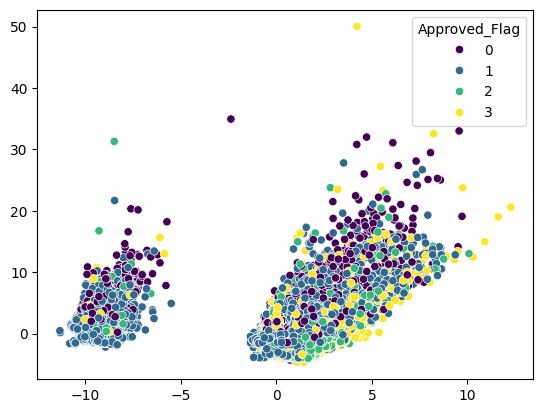

In [ ]:
# До применения SMOTE
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y_train, palette='viridis')
plt.show()

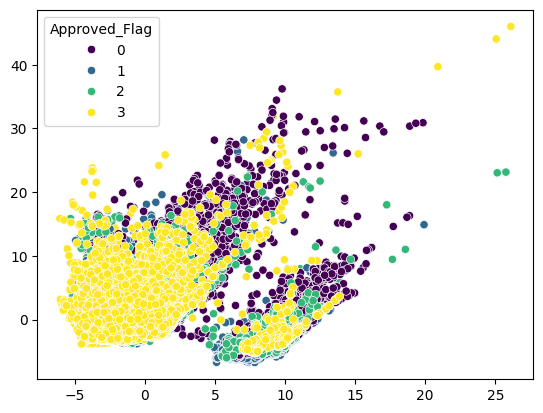

In [ ]:
# После применения SMOTE
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_res)
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y_res, palette='viridis')
plt.show()

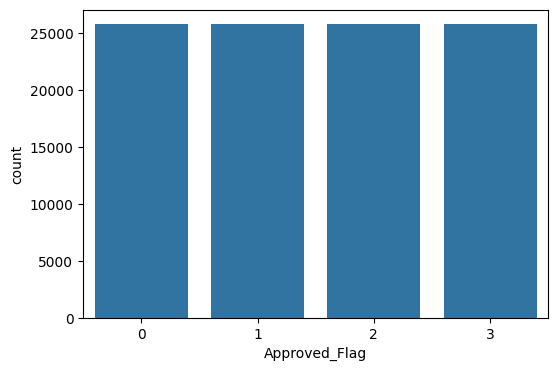

In [72]:
plt.figure(figsize=(6,4))
sns.countplot(x=y_res)
plt.show()

## Логистическая регрессия

In [ ]:
# Создаем логистическую регрессию
lr_model = LogisticRegression(max_iter=1000)

# Задаем параметры
lr_params = {
    'C': np.logspace(-4, 2, 7)
}

In [ ]:
# Выполняем случайный поиск гиперпараметров
lr_search = RandomizedSearchCV(
    lr_model, lr_params, n_iter=5, scoring="f1", cv=4, n_jobs=-1, random_state=42
)
lr_search.fit(X_res, y_res)

RandomizedSearchCV(cv=4, estimator=LogisticRegression(max_iter=1000), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'C': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
                   random_state=42, scoring='f1')

In [ ]:
# Функкция для оценки качества модели
def evaluate_model(model):
    y_pred = model.predict(preprocessed_X_test)
    print(classification_report(y_test, y_pred))

In [38]:
evaluate_model(lr_search.best_estimator_)

              precision    recall  f1-score   support

           0       0.42      0.83      0.55      1161
           1       0.86      0.54      0.66      6440
           2       0.25      0.33      0.29      1491
           3       0.40      0.67      0.51      1176

    accuracy                           0.56     10268
   macro avg       0.48      0.59      0.50     10268
weighted avg       0.67      0.56      0.58     10268



In [39]:
lr_search.best_params_

{'C': 0.0001}

## Градиентный Бустинг

In [ ]:
# Создаём XGBoost-модель
xgb_model = xgb.XGBClassifier()

# Задаём сетку гиперпараметров для подбора оптимальной модели
xgb_params = {
    'max_depth': [7, 9, 10],         # Different depths for the trees
    'gamma': [0.1, 0.15, 0.3],         # Minimum loss reduction to make a split
    'alpha': [0.1, 0.15, 0.3],         # L1 regularization term on weights
    'reg_lambda': [1.5, 2, 2.5],          # L2 regularization term on weights
    'learning_rate': [0.02, 0.05, 0.1], # Learning rate
    'n_estimators': [200, 300, 400]   # Number of trees
}

In [ ]:
# Случайный поиск гиперпараметров
xgb_search = RandomizedSearchCV(
    xgb_model, xgb_params, n_iter=10, scoring="f1", cv=4, n_jobs=-1, random_state=42
)
xgb_search.fit(X_res, y_res)

RandomizedSearchCV(cv=4,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'alpha': [0.1, 0.15, 0.3],
                                        'gamma': [0.1, 0.15, 0.3],
                                        'learning_rate': [0.02, 0.05, 0.1],
                                        'max_depth': [7, 9, 10],
                                        'n_estimators': [200, 300, 400],
                                        'reg_lambda': [1.5, 2, 2.5]},
                   random_state=42, scoring='f1')

In [75]:
xgb_search.best_params_

{'reg_lambda': 1.5,
 'n_estimators': 200,
 'max_depth': 9,
 'learning_rate': 0.1,
 'gamma': 0.3,
 'alpha': 0.15}

In [ ]:
# создаём объект XGBoost классификатора
model = xgb.XGBClassifier(reg_lambda=1.5, n_estimators=200, max_depth=9, learning_rate=0.1, gamma=0.3, alpha=0.15)

In [ ]:
# Обучаем модель
model.fit(X_res, y_res)

XGBClassifier(alpha=0.15, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [79]:
evaluate_model(model)

              precision    recall  f1-score   support

           0       0.78      0.82      0.80      1161
           1       0.86      0.90      0.88      6440
           2       0.46      0.33      0.38      1491
           3       0.76      0.77      0.76      1176

    accuracy                           0.80     10268
   macro avg       0.71      0.71      0.71     10268
weighted avg       0.78      0.80      0.79     10268



In [80]:
model.predict(preprocessed_X_test)

array([3, 1, 1, ..., 1, 0, 2], dtype=int64)

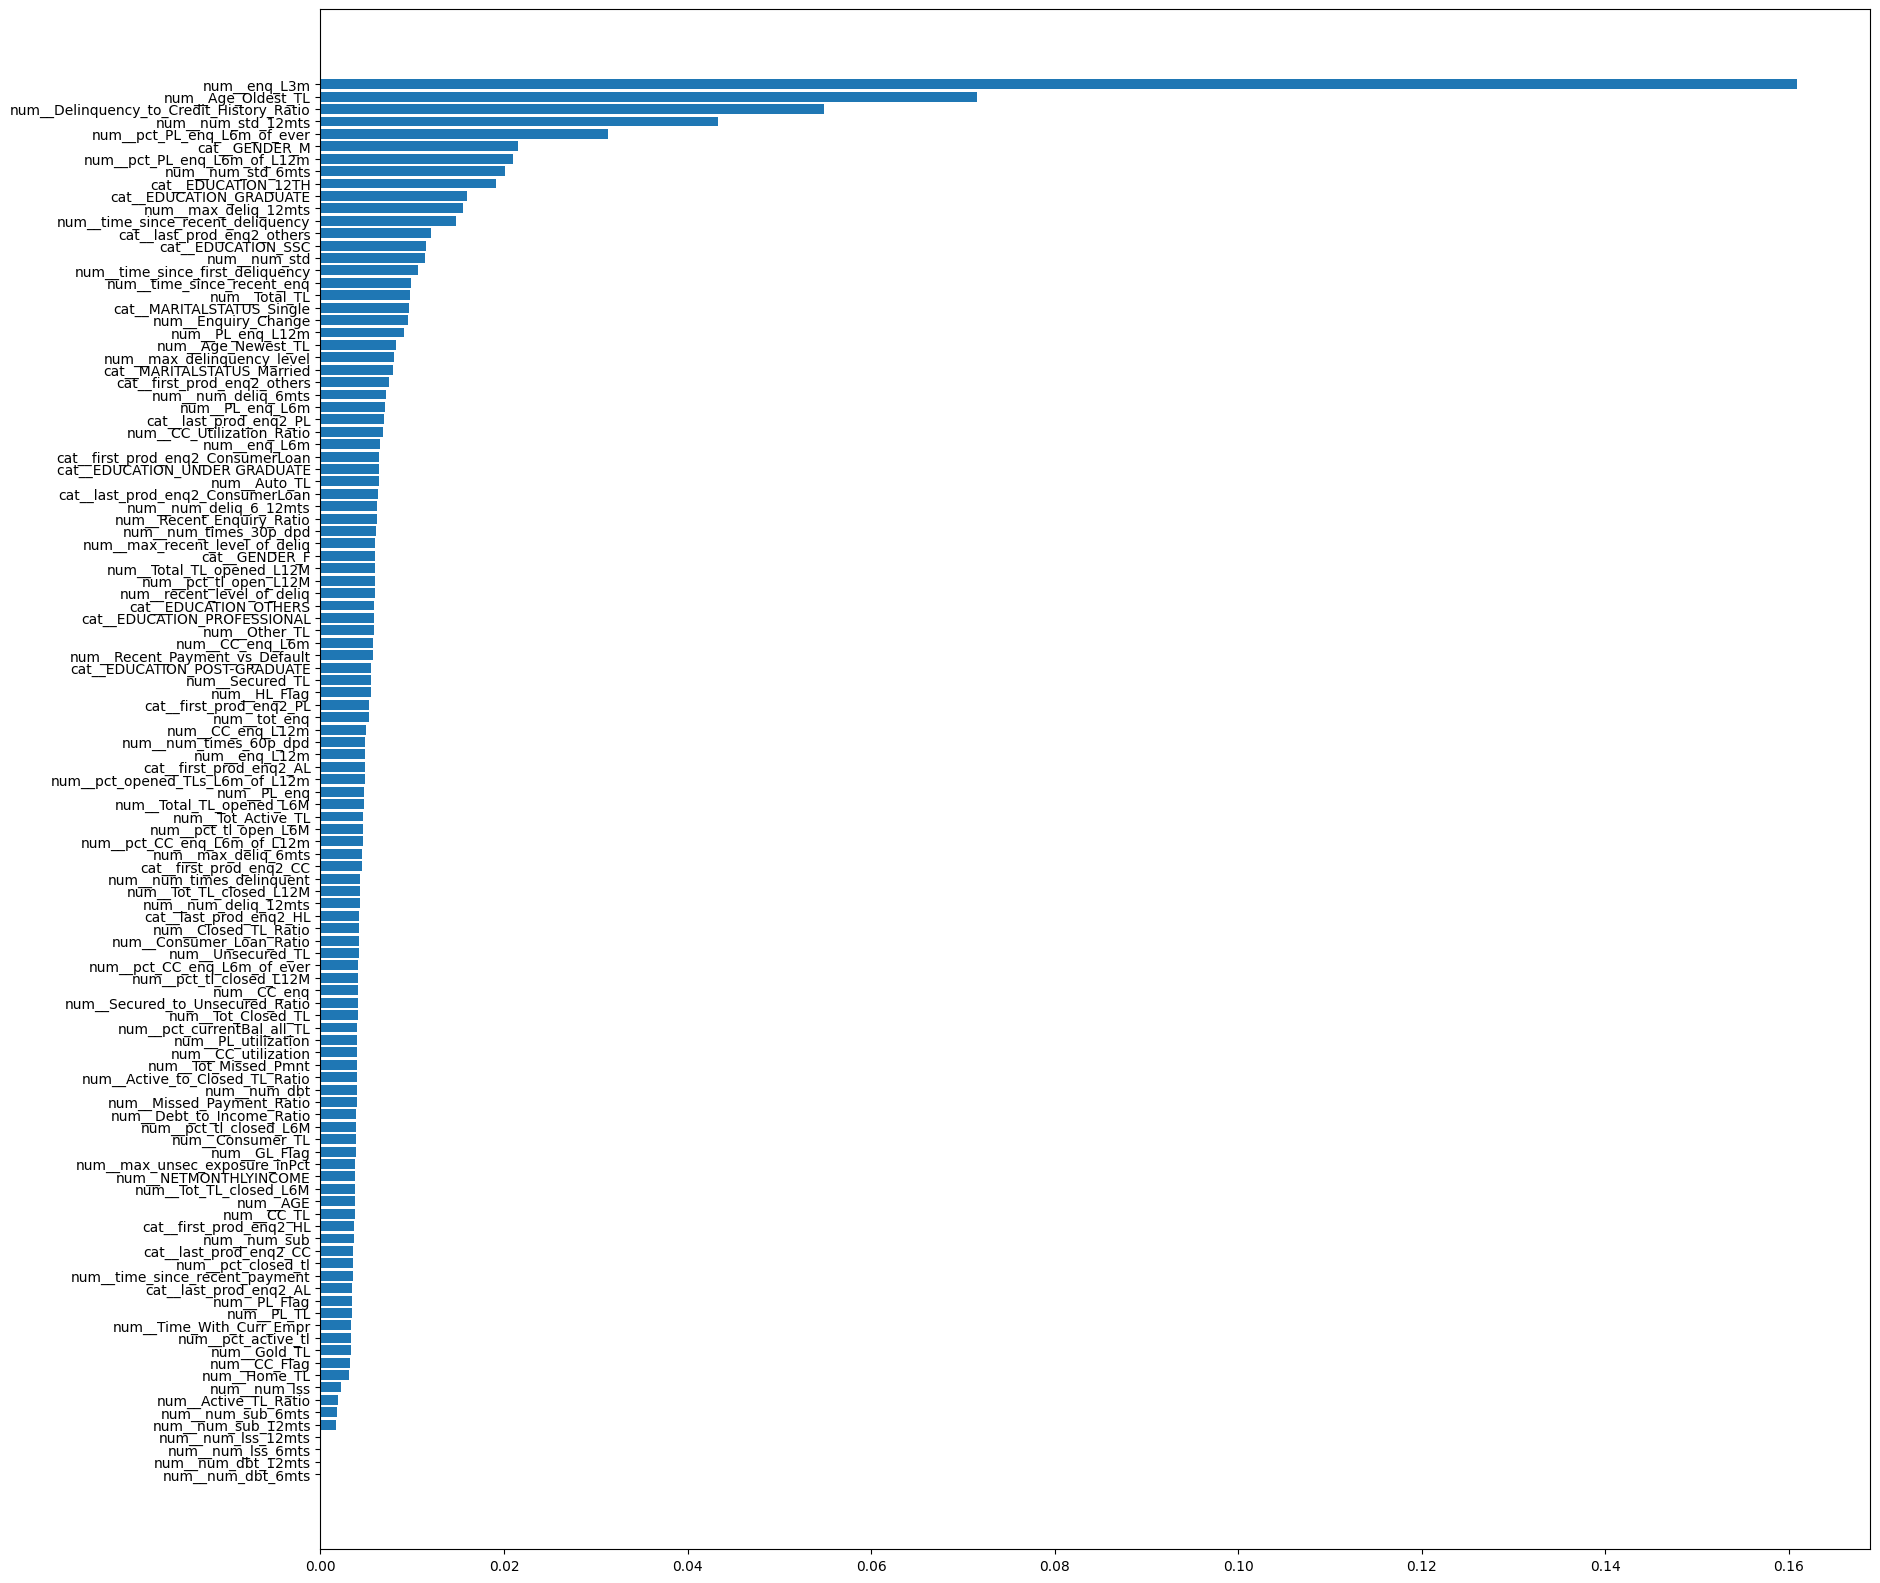

In [ ]:
# Визуализируем важность признаков
sorted_importances = model.feature_importances_.argsort()

plt.figure(figsize=(20,20))
plt.barh(feature_names[sorted_importances], model.feature_importances_[sorted_importances])
plt.show()

## Случайный лес

In [ ]:
# Создание модели случайного леса
rf_model = RandomForestClassifier(random_state=42)

# Создание сетки гиперпараметров
rf_params = {
    "n_estimators": [100, 200, 300],  # Количество деревьев
    "max_depth": [None, 10, 20, 30],  # Глубина деревьев
    "min_samples_split": [2, 5, 10],  # Минимальное количество выборок для разбиения
    "min_samples_leaf": [1, 2, 4],    # Минимальное количество выборок в листе
    "bootstrap": [True, False]        # Использование бутстрапа
}

In [ ]:
# Подборка лучших гиперпараметров
rf_search = RandomizedSearchCV(
    rf_model, rf_params, n_iter=10, scoring="f1_weighted", cv=4, n_jobs=-1, random_state=42
)

rf_search.fit(X_res, y_res)

RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='f1_weighted')

In [84]:
print("Лучшие параметры случайного леса:", rf_search.best_params_)
print("Лучший F1-score:", rf_search.best_score_)

Лучшие параметры случайного леса: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': False}
Лучший F1-score: 0.9184304536177266


In [ ]:
# Обучение
best_rf = RandomForestClassifier(**rf_search.best_params_)
best_rf.fit(X_res, y_res)

RandomForestClassifier(bootstrap=False, min_samples_split=5)

In [89]:
evaluate_model(best_rf)

              precision    recall  f1-score   support

           0       0.75      0.82      0.78      1161
           1       0.86      0.88      0.87      6440
           2       0.44      0.37      0.40      1491
           3       0.74      0.75      0.75      1176

    accuracy                           0.78     10268
   macro avg       0.70      0.71      0.70     10268
weighted avg       0.78      0.78      0.78     10268



In [ ]:
rf_preds = best_rf.predict(preprocessed_X_test)

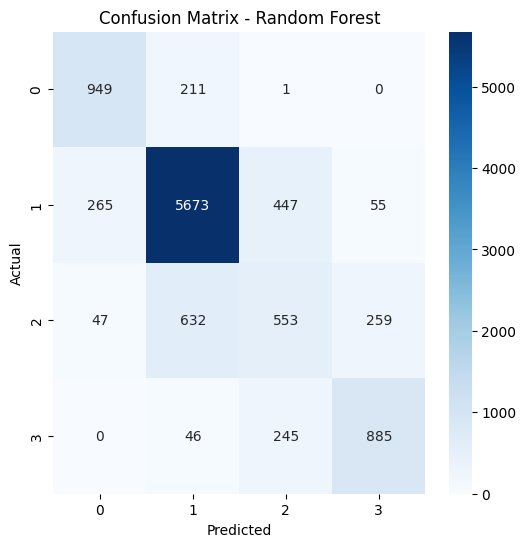

In [ ]:
# Создаем матрицу ошибок
cm = confusion_matrix(y_test, rf_preds)

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1,2,3], yticklabels=[0,1,2,3])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

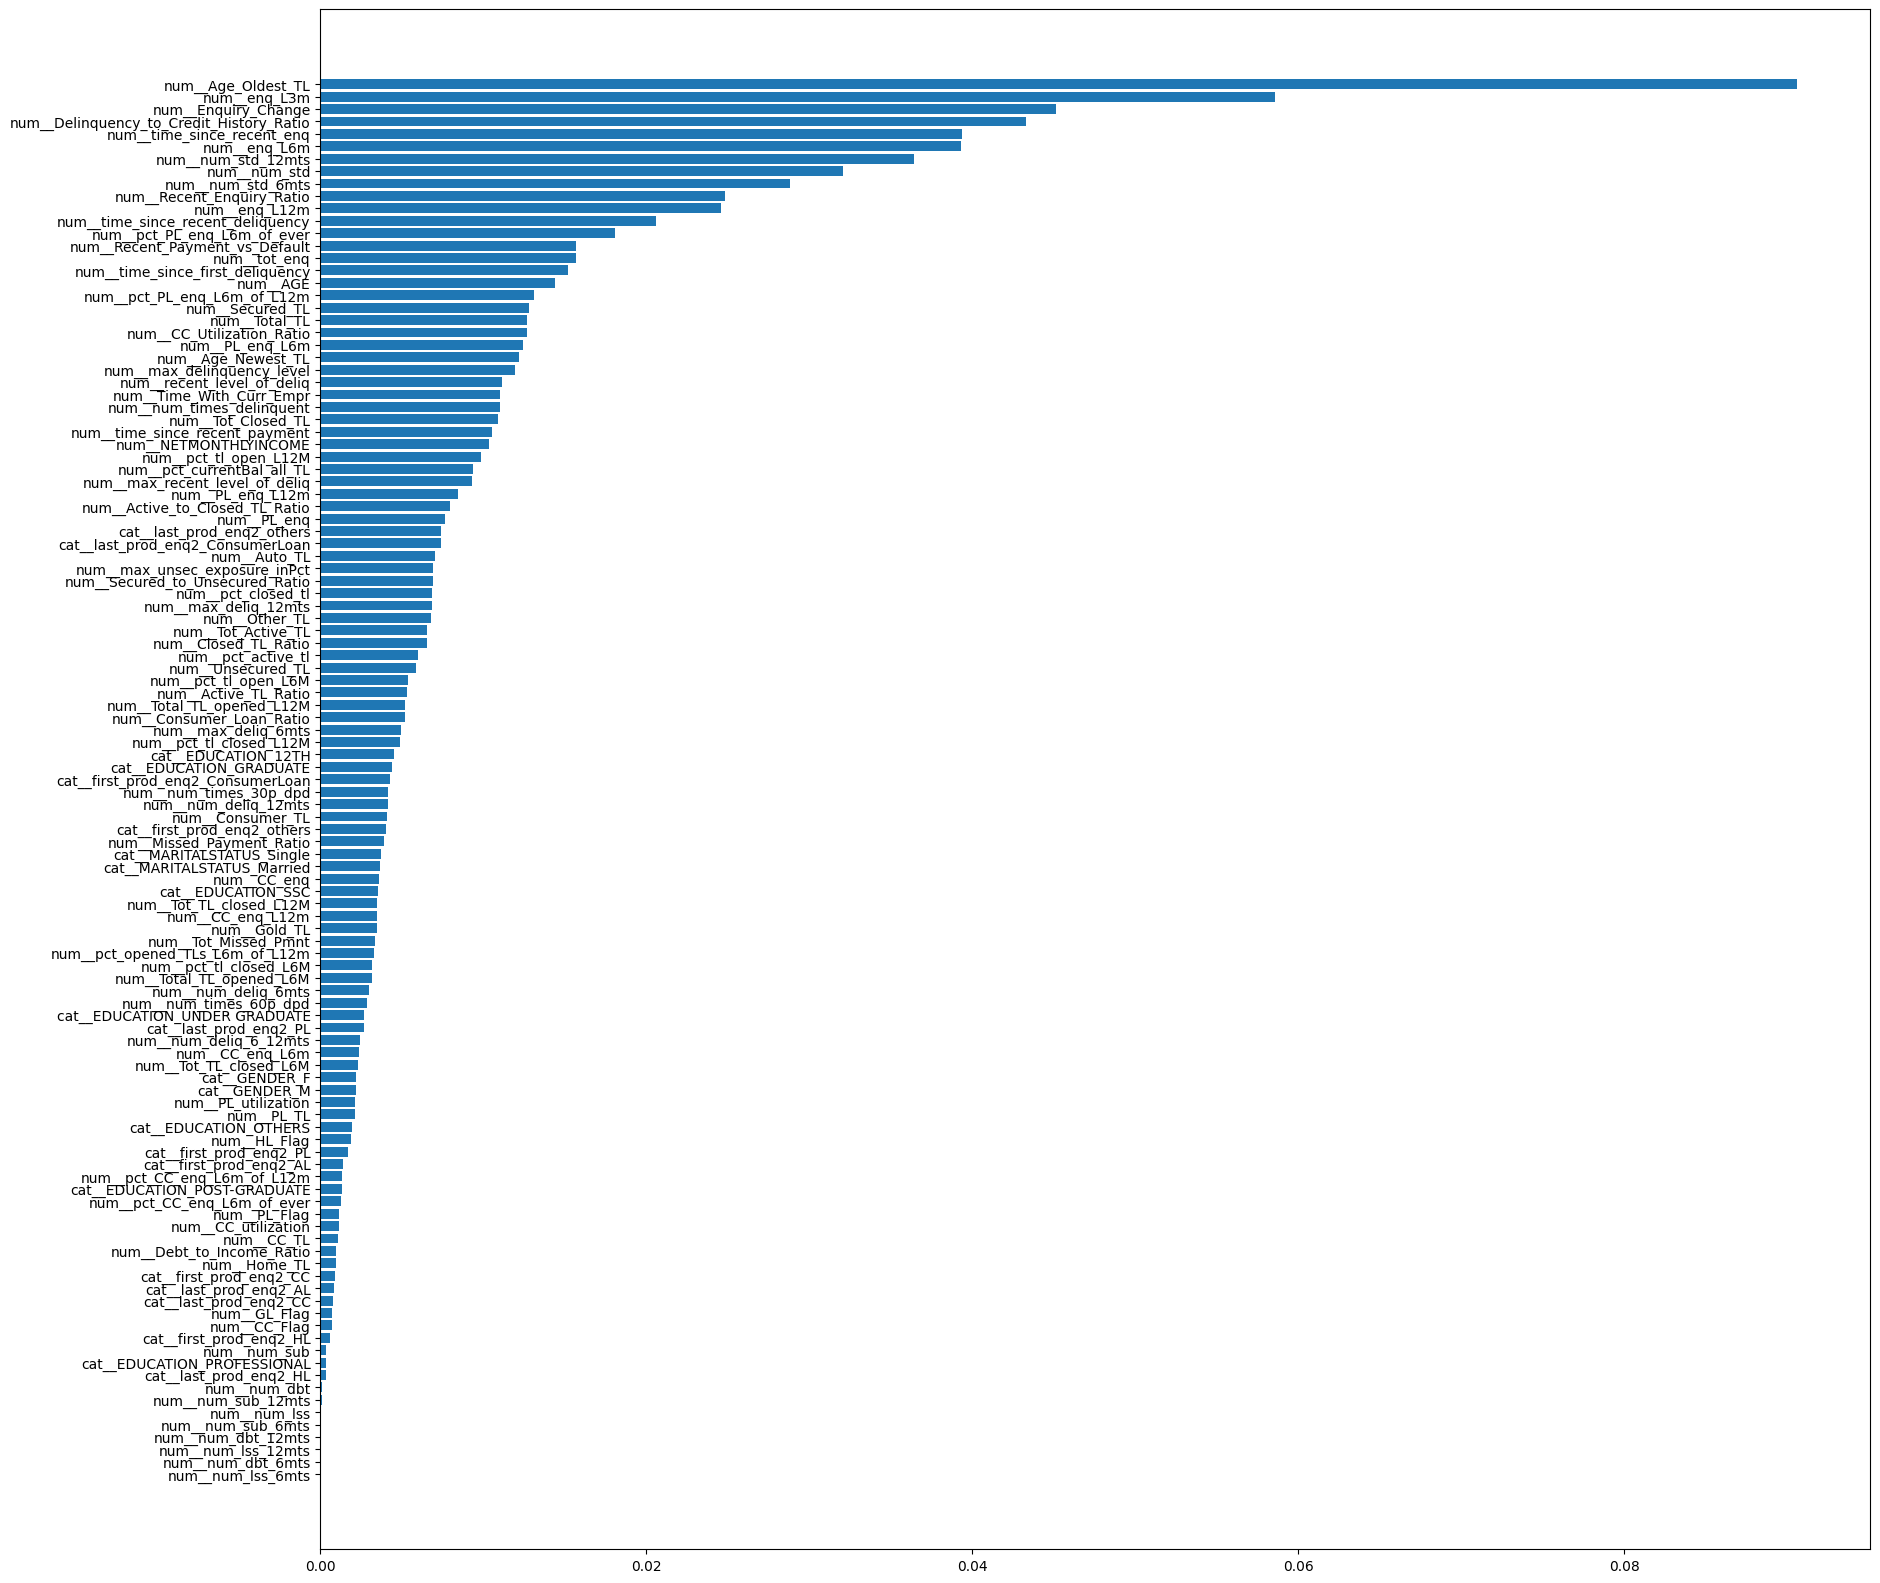

In [ ]:
# Визуализируем важность признаков
sorted_importances = best_rf.feature_importances_.argsort()

plt.figure(figsize=(20,20))
plt.barh(feature_names[sorted_importances], best_rf.feature_importances_[sorted_importances])
plt.show()